**Regression for Moore's Law**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.1.0


In [7]:
# getting the data

# This will work on google colab

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

SyntaxError: invalid syntax (<ipython-input-7-286871d6d792>, line 3)

In [7]:
!ls

moore.csv  sample_data


In [6]:
# reading the moore.csv file using the pandas

my_data1 = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv", header=None).values

In [7]:
my_data1

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
# dividing the data in X and y

X = my_data1[:,0]

In [9]:
y = my_data1[:,1]

In [10]:
type(X)

numpy.ndarray

In [11]:
X

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20

In [12]:
X.shape

(162,)

In [13]:
y.shape

(162,)

In [14]:
# reshaping the data X into the 2D array of the size N x D where N is number of instances and D = 1
# This is the covention that X should be a 2-D array 

# tensorflow and keras expect that data should be in that order

# -1, 1 means -1 number of rows and 1 column, and -1 means last row number that is 162.
X = X.reshape(-1,1)

In [15]:
X.shape

(162, 1)

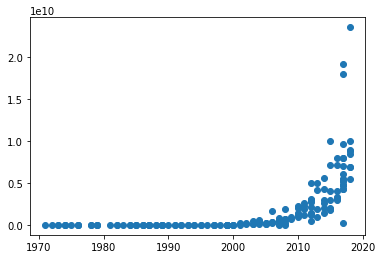

In [16]:
# Doing the scatter plot

# x is the years and y is the number of transisters

plt.scatter(X,y)

In [17]:
# scatter plot with X and y again but after taking log of y this time 

# Taking log of the equation C = a*r^t will make this equation look like an equation of line....

y = np.log(y)

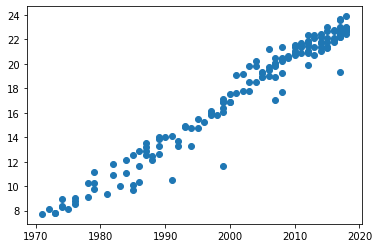

In [18]:
# Because of we taking the log of the data, scatter plot is coming out to be linear.

plt.scatter(X,y)

In [19]:
# Now, centre the values of X so that values wont be that large
# So, subtract the values by mean.
# It is like scaling the data but not exactly

X = X - X.mean()

---
Now, let's start building the tensorflow model.
There wont be any activation function as it is a linear model.

In [20]:
# shape paramter will take the D which is number of feature and 
 # Dense will take the dimension of output which is again 1
lm_model1 = tf.keras.models.Sequential([
                                        tf.keras.layers.Input(shape=(1,)),
                                        tf.keras.layers.Dense(1)
])

In [21]:
# compiling the model

# loss will be mean square error
# SGD is taking learning rate and momentum as parameters
lm_model1.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

---
Creating the learning rate scheduler

In [22]:
# we are creating our own scheduler function though it is already in keras API, you can check the documentation

# Function takes two arguments one is epoch number and second is the learning rate 
def schedule(epoch,lr):
  if epoch >= 60:
    return 0.0001
  return 0.001  

In [23]:
# passing this schedule function into the LearningRateScheduler

# This LearningRatesScheduler takes the epoch number and returns the learning rate.

# Check the documentation of the LearningRateScheduler
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [24]:
# Now training the model

# Here, callback will be calling some other function which is just above.
result1 = lm_model1.fit(X,y,epochs=250, callbacks=[scheduler])

Train on 162 samples
Epoch 1/250
162/162 [==============================] - 0s 1ms/sample - loss: 314.8700
Epoch 2/250
162/162 [==============================] - 0s 37us/sample - loss: 355.2261
Epoch 3/250
162/162 [==============================] - 0s 43us/sample - loss: 293.2742
Epoch 4/250
162/162 [==============================] - 0s 37us/sample - loss: 201.9618
Epoch 5/250
162/162 [==============================] - 0s 43us/sample - loss: 180.3403
Epoch 6/250
162/162 [==============================] - 0s 37us/sample - loss: 139.9174
Epoch 7/250
162/162 [==============================] - 0s 43us/sample - loss: 118.7673
Epoch 8/250
162/162 [==============================] - 0s 37us/sample - loss: 94.4384
Epoch 9/250
162/162 [==============================] - 0s 31us/sample - loss: 73.5010
Epoch 10/250
162/162 [==============================] - 0s 37us/sample - loss: 55.8534
Epoch 11/250
162/162 [==============================] - 0s 31us/sample - loss: 52.1682
Epoch 12/250
162/162 [===

162/162 [==============================] - 0s 31us/sample - loss: 0.8720
Epoch 96/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8732
Epoch 97/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8716
Epoch 98/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8733
Epoch 99/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8727
Epoch 100/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8739
Epoch 101/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8775
Epoch 102/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8773
Epoch 103/250
162/162 [==============================] - 0s 25us/sample - loss: 0.8752
Epoch 104/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8736
Epoch 105/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8746
Epoch 106/250
162/162 [==============================] - 0s 3

162/162 [==============================] - 0s 37us/sample - loss: 0.8831
Epoch 190/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8738
Epoch 191/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8748
Epoch 192/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8744
Epoch 193/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8755
Epoch 194/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8765
Epoch 195/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8761
Epoch 196/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8849
Epoch 197/250
162/162 [==============================] - 0s 43us/sample - loss: 0.8838
Epoch 198/250
162/162 [==============================] - 0s 31us/sample - loss: 0.8738
Epoch 199/250
162/162 [==============================] - 0s 37us/sample - loss: 0.8908
Epoch 200/250
162/162 [==============================] - 

---
Plotting the loss per iteration

Text(0, 0.5, 'Loss')

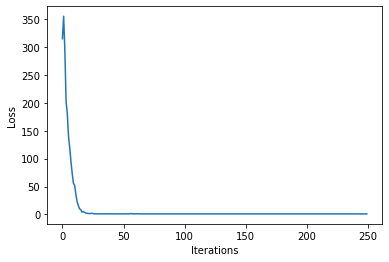

In [25]:
# loss has gone pretty low as the number of iteration have increased .....

plt.plot(result1.history['loss'],label = 'loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')    

In [26]:
# There are two types of layers while creating the model

# one is Input and other is Dense.

# When we call the model.layers it will only show the Dense layer, it means Input layer is just a dummy layer for Dense layer.

# Dummy layer's work is just to keep track of the input size 

print(lm_model1.layers)

In [27]:
# getting the weights

# This will give the slope or you can say weight(w) and other is predictor or b or x 
print(lm_model1.layers[0].get_weights())

# w is a 2D array and b is one D even though both have only one number.

# input is d size and output is m size
 # then w is d x m dimension....

[array([[0.32664338]], dtype=float32), array([17.767452], dtype=float32)]


In our case both input and output are of size 1 hence w is of 1,1 and b is of size 1 

In [28]:
# getting the slope of the line

a = lm_model1.layers[0].get_weights()[0][0,0]

In [29]:
a

0.32664338

In [30]:
# after some mathematical calculations we have come to understand that time difference in becoming the twice the output is 

# log(2)/a   where a is the slope

# calculating the time difference

print("Time for double the number of transisters: ", np.log(2)/a)

Time for double the number of transisters:  2.122030410580628


Hence, Moore's law is right and confirmed

---

---

# Making Predictions

In [31]:
yhat = lm_model1.predict(X).flatten()

In [32]:
print(yhat)

[ 7.5769854  7.9036283  8.230272   8.230272   8.556915   8.556915
  8.556915   8.883559   9.210202   9.210202   9.210202   9.863489
  9.863489  10.190132  10.190132  10.190132  10.843419  11.170063
 11.170063  11.496706  11.823349  11.823349  12.149993  12.149993
 12.149993  12.476636  12.476636  12.476636  12.80328   12.80328
 12.80328   12.80328   13.129923  13.129923  13.456566  13.456566
 13.456566  13.456566  13.78321   14.109853  14.109853  14.436497
 14.436497  14.76314   14.76314   15.089783  15.089783  15.416427
 16.723     15.416427  15.74307   16.069714  16.069714  16.069714
 16.396357  16.723     16.723     17.049643  17.049643  16.723
 16.723     16.723     17.049643  17.376287  17.376287  17.70293
 18.356216  18.356216  18.68286   19.009504  18.68286   19.009504
 19.336147  19.66279   18.029573  18.029573  17.70293   18.68286
 18.68286   19.009504  19.336147  18.029573  19.66279   19.989433
 20.642721  20.969364  19.336147  19.336147  19.66279   18.356216
 19.336147  19.6

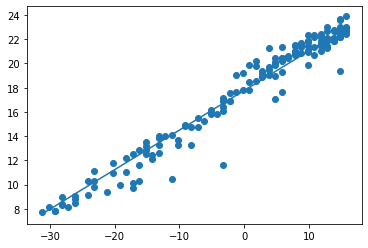

In [34]:
# Plotting

plt.scatter(X,y)

plt.plot(X,yhat)

straight Line is fitting the data

It's kind of double confirmation of moore's law being true

---

In [35]:
# Manual Calculation

# get the weights

w, b = lm_model1.layers[0].get_weights()

In [36]:
w

array([[0.32664338]], dtype=float32)

In [37]:
b

array([17.767452], dtype=float32)

In [38]:
# Reshaping the X because we flatten it earlier

X = X.reshape(-1, 1)

In [39]:
X.shape

(162, 1)

In [40]:
# Doing the Linear transformation

# x.w + b   => x*m + c

# x is of (162,1) and w is of (1,1), resulting value will be of (162,1)
 # which adds with b 

# you need to flatten it    

yhat2 = (X.dot(w) + b). flatten()



In [41]:
# Now, comparing and dont use == in case of floating point because values will not match at all and it 
 # all will result in false on comparison
    
print(np.allclose(yhat,yhat2))    

True


---

# Saving and Loading the Model


In [42]:
# saving the model

lm_model1.save("lm_model1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: lm_model1\assets


In [43]:
# Now, loading the model will only work if you have created the model with the method in which Input layer is 
 # just the parameter of the keras layer

# Else, in other method where Input layer is passed explicitly, the load method will fail. 

lm_model_load1 = tf.keras.models.load_model("lm_model1") 

In [44]:
lm_model_load1.layers

In [45]:
# Running the previous functions again 

w, b = lm_model_load1.layers[0].get_weights()

In [46]:
w

array([[0.32664338]], dtype=float32)

In [47]:
b

array([17.767452], dtype=float32)

In [48]:
X = X.reshape(-1, 1)

In [49]:
X.shape

(162, 1)

In [50]:
yhat2 = (X.dot(w) + b). flatten()

In [51]:
print(np.allclose(yhat,yhat2)) 

True


Hence, Proved that model did load 

---

In [52]:
# If you were working on google colab then you can download model as well by clocking on the arrow on left side
# Other method is using python


# This code will work while working on google colab only
from google.colab import files

files.download("lm_model1")

ModuleNotFoundError: No module named 'google.colab'